 Return of a Portfolio of Securities

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [6]:
#Load the data
tickers = ['NEE', 'TSLA', 'FSLR', 'BEP', 'SEDG', 'ENPH', 'ORA', 'LNG', 'NEP', 'AY']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2016-1-1')['Close']

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-01-04 to 2021-03-09
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NEE     1304 non-null   float64
 1   TSLA    1304 non-null   float64
 2   FSLR    1304 non-null   float64
 3   BEP     1304 non-null   float64
 4   SEDG    1304 non-null   float64
 5   ENPH    1304 non-null   float64
 6   ORA     1304 non-null   float64
 7   LNG     1304 non-null   float64
 8   NEP     1304 non-null   float64
 9   AY      1304 non-null   float64
dtypes: float64(10)
memory usage: 112.1 KB


In [8]:
mydata.head()

,NEE,TSLA,FSLR,BEP,SEDG,ENPH,ORA,LNG,NEP,AY
Date,,,,,,,,,,
2016-01-04,25.892500,44.681999,66.720001,13.562483,28.000000,3.49,35.150002,37.509998,29.230000,18.620001
2016-01-05,26.145000,44.686001,72.029999,13.685052,29.490000,3.35,35.230000,38.470001,28.610001,18.370001
2016-01-06,26.059999,43.807999,69.519997,13.498535,29.129999,3.16,35.630001,37.060001,28.280001,17.990000
2016-01-07,26.174999,43.130001,66.220001,12.757794,27.660000,3.00,35.360001,34.970001,27.110001,17.500000
2016-01-08,26.292500,42.200001,65.620003,12.571276,26.709999,2.99,35.380001,35.009998,28.080000,17.650000


In [9]:
mydata.tail()

,NEE,TSLA,FSLR,BEP,SEDG,ENPH,ORA,LNG,NEP,AY
Date,,,,,,,,,,
2021-03-03,72.519997,653.200012,78.879997,42.259998,274.730011,161.119995,81.239998,69.080002,72.070000,34.509998
2021-03-04,71.290001,621.440002,75.360001,40.540001,256.260010,149.880005,78.199997,73.269997,69.459999,34.770000
2021-03-05,70.699997,597.950012,73.699997,38.779999,249.429993,143.550003,80.199997,72.650002,69.260002,35.160000
2021-03-08,70.860001,563.000000,71.449997,38.430000,246.710007,132.059998,79.199997,73.199997,69.739998,35.040001
2021-03-09,74.184998,633.679993,75.779999,40.528400,275.679993,148.460007,83.724998,74.106003,73.334999,36.200001


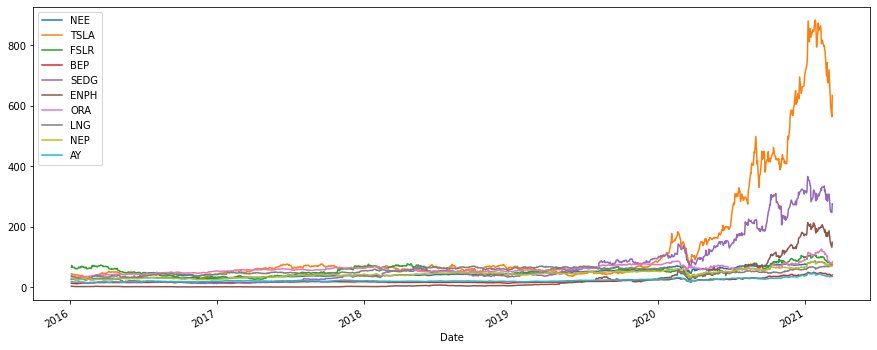

In [10]:
mydata.plot(figsize = (15, 6))
plt.show()

### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [11]:
mydata.iloc[0]

NEE     25.892500
TSLA    44.681999
FSLR    66.720001
BEP     13.562483
SEDG    28.000000
ENPH     3.490000
ORA     35.150002
LNG     37.509998
NEP     29.230000
AY      18.620001
Name: 2016-01-04 00:00:00, dtype: float64

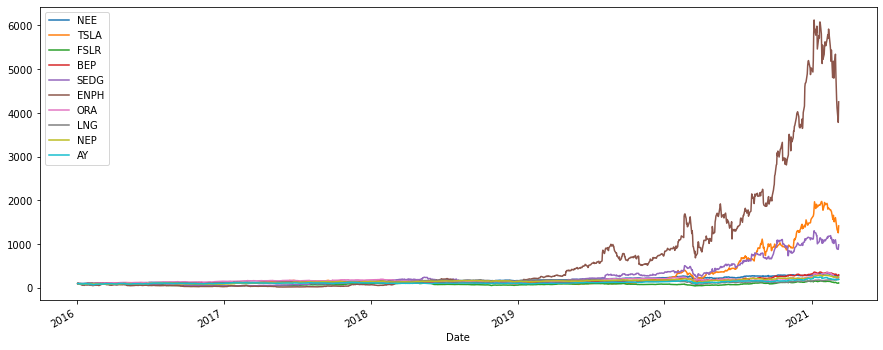

In [12]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

*****

Calculating the Return 

In [13]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,NEE,TSLA,FSLR,BEP,SEDG,ENPH,ORA,LNG,NEP,AY
Date,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.009752,0.000090,0.079586,0.009037,0.053214,-0.040115,0.002276,0.025593,-0.021211,-0.013426
2016-01-06,-0.003251,-0.019648,-0.034847,-0.013629,-0.012208,-0.056716,0.011354,-0.036652,-0.011534,-0.020686
2016-01-07,0.004413,-0.015477,-0.047468,-0.054876,-0.050463,-0.050633,-0.007578,-0.056395,-0.041372,-0.027237
2016-01-08,0.004489,-0.021563,-0.009061,-0.014620,-0.034346,-0.003333,0.000566,0.001144,0.035780,0.008571


In [14]:
change=mydata.pct_change()
change.head()

,NEE,TSLA,FSLR,BEP,SEDG,ENPH,ORA,LNG,NEP,AY
Date,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.009752,0.000090,0.079586,0.009037,0.053214,-0.040115,0.002276,0.025593,-0.021211,-0.013426
2016-01-06,-0.003251,-0.019648,-0.034847,-0.013629,-0.012208,-0.056716,0.011354,-0.036652,-0.011534,-0.020686
2016-01-07,0.004413,-0.015477,-0.047468,-0.054876,-0.050463,-0.050633,-0.007578,-0.056395,-0.041372,-0.027237
2016-01-08,0.004489,-0.021563,-0.009061,-0.014620,-0.034346,-0.003333,0.000566,0.001144,0.035780,0.008571


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

Make sre portfolios weight must sum up to 1

In [15]:
weights = np.array([0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10])

In [16]:
annual_returns = returns.mean() * 250
annual_returns

NEE     0.229756
TSLA    0.677288
FSLR    0.134477
BEP     0.253383
SEDG    0.624645
ENPH    1.092148
ORA     0.217774
LNG     0.200831
NEP     0.243358
AY      0.179631
dtype: float64

In [17]:
np.dot(annual_returns, weights)

0.3853291499903774

In [18]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

38.533 %


In [19]:
weights_2 = np.array([0.25, 0.05, 0.15, 0.1, 0.02, 0.18, 0.05, 0.08, 0.12, 0.1])

In [20]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print ('pfolio_2 is '+pfolio_2)
print ('pfolio_1 is '+ pfolio_1)

pfolio_2 is 42.001 %
pfolio_1 is 38.533 %
